# Euler's Method

### Overview
Here we'll develop some skill at simulating how the atmosphere and land arrive at a steady state over time. The key piece of this is an algorithm called *Euler's method*. 

### Fluxes between the atmosphere and the land using 1st-order kinetics
We've already talked about expressing the rate (flux) at which carbon is transferred from the atmosphere to land as  a process that depends on how much carbon is in the atmosphere. We're going to complicate the 1st-order-kinetic   formula we introduced before, slightly, as 

$$
F_{atm->land} = k_{al0} + k_{al1} [C_{atm}] \ \ \ (1) 
$$

where $k_{al0}$ and $k_{al1}$ are constants. This is a little more accurate, although it does ignore feedbacks (which we'll get back to later). Now, say we also have a flux from the land *back* to the atmosphere,

$$
F_{land->atm} =  k_{la} \ \ \ (2) 
$$

where $k_{la}$ is another constant. 

If these fluxes were in balance, namely, $F_{atm->land}=F_{land->atm}$, we would say that the climate is in a state of *mass balance*; in biology, this is called *homeostasis* (which could apply to the Earth, if one considered the Earth as a living organism ... see, e.g., https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003050).

But of course, the fluxes are generally not in balance, especially if humans are dumping gigatons of carbon into the air. That is to say, the amount of carbon in the air changes as a result of the flux imbalance: 

$$
\Delta [C_{atm}] = (F_{land->atm} - F_{atm->land}) \times \Delta t \ \ \ (3)
$$

where $\Delta t$ is some period of time we're interested in, and $\Delta [C_{atm}]$ is how much $[C_{atm}]$ changed during that time.

### Euler's method

You may have noticed a problem here, in that $[C_{atm}]$ depends on the fluxes, but those fluxes depend on $[C_{atm}]$! Equations (1)-(3)) therefore constitute what's called a *differential equation*. In general, there are a lot of methods for solving this connundrum. Here, we'll learn to use a fairly simple, numerical one called *Euler's Method*, because it's pretty straightforward to implement in Python, and easy to extend to complicated, temperature-dependent feedback situations that we've talked about before.

Euler's Method says, basically, plan on taking a bunch of tiny time steps, each so small enough that for the purpose of calculating the fluxes, we can get away with saying $[C_{atm}]$ is just the value it had in the *previous* time step (which already know). Then, we can update $[C_{atm}]$ for the next time step, using Eq. (3). 

### For loops and the "+=" construct
As you may well have guessed, those tiny steps will be set up using a *for loop*, which you already know about. The "updating" of $[C_{atm}]$ just referred to, in each iteration of your *for loop*, will be accomplished by Python's "+=" construct, which you'll catch on to after an example or two.

### Learning objectives
1. I can numerically solve 1st order kinetic problems using Euler's method set up in a *for loop*
1. I can use the "+=" construct

In [1]:
# Bring in resources
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

### Implementing Euler's method
Now we're going solve for $[C_{atm}]$ as a function of time, according to the theory laid out in the Introduction.

<IPython.core.display.Javascript object>


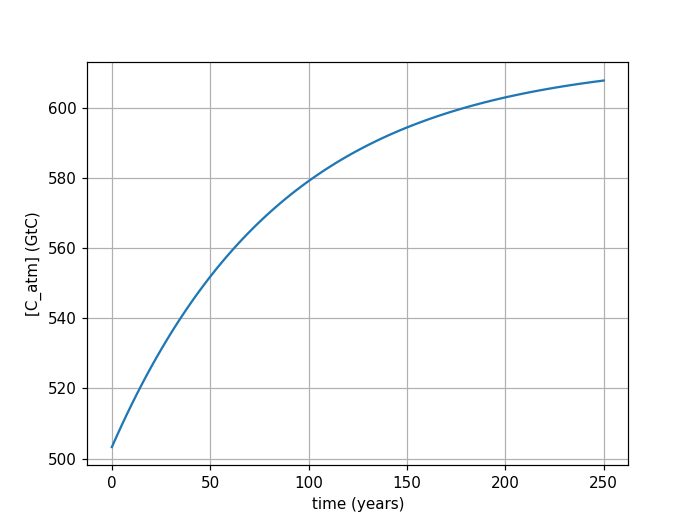

Text(0, 0.5, '[C_atm] (GtC)')

In [5]:
# Constants
k_al0 = 113
k_al1 = 0.0114
k_la = 120

# This is the starting amount of carbon in the atmosphere, in GtC
C_atm = 500

# Here's a time array
time = np.linspace(0,250,100)

# Calculating the time step
dt = time[1]-time[0]

# Initializing the array that will hold the atmospheric carbon amount over time
C_atm_array = np.empty(0)

# Looping
for i in range(len(time)):
    
    # This calculates the fluxes of this iteration of the loop
    F_al = k_al0 + k_al1*C_atm
    F_la = k_la
    
    # This calculates the change in C_atm
    delta_C_atm = (F_la - F_al)*dt
    
    # Get the new C_atm (and append it to our array)
    C_atm += delta_C_atm
    C_atm_array = np.append(C_atm_array,C_atm)

# Plot the results
plt.figure()
plt.plot(time,C_atm_array)
plt.grid(True)
plt.xlabel('time (years)')
plt.ylabel("[C_atm] (GtC)")

### Your turn
Now you're going do almost the exact same thing, but with a few additions. Here's what to do:

1. Extend the time to 500 years;
1. Initialize *three* empty numpy arrays (one for the for the concentration of carbon in the atmosphere, as before, and two more for the fluxes $F_{atm->land}$ and $F_{land->atm}$);
1. Inside your loop, append the concentration of carbon in the atmosphere to your array as before, but also append the fluxes to the two other arrays; and 
1. Once the loop is over, make two plots. In one window, plot the concentration as a function of time, as before. In a second plot window, plot the two flux arrays together. Annotate these using the label/legend method.

<IPython.core.display.Javascript object>


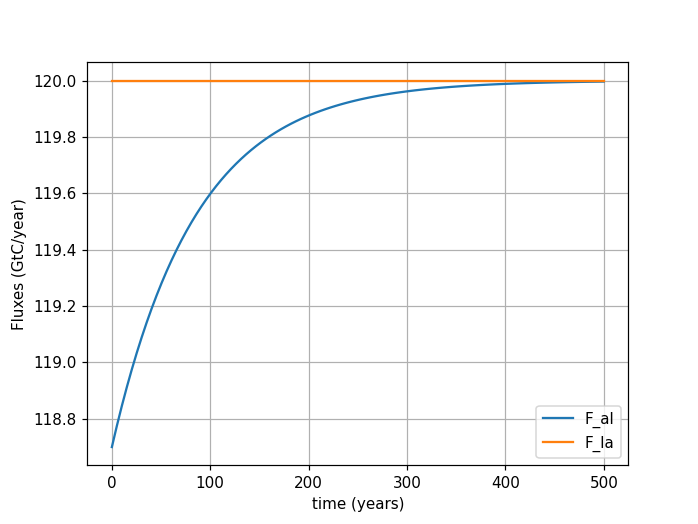

<IPython.core.display.Javascript object>


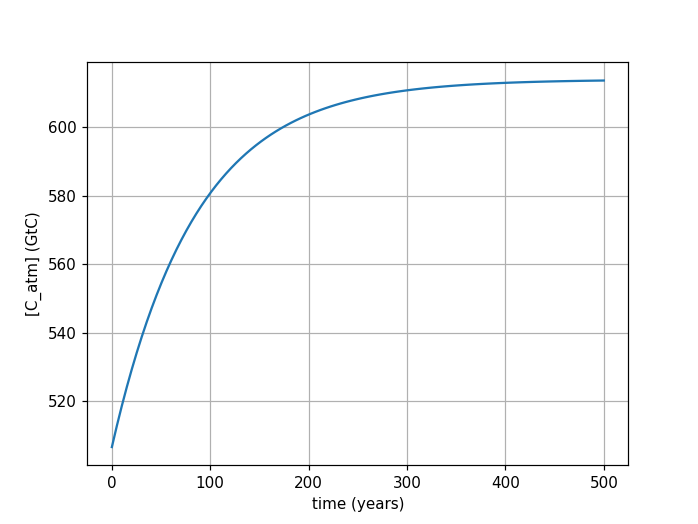

Text(0, 0.5, '[C_atm] (GtC)')

In [4]:
# Constants
k_al0 = 113
k_al1 = 0.0114
k_la = 120

# This is the starting amount of carbon in the atmosphere, in GtC
C_atm = 700

# Create the time array using np.linspace, this time going up to 50 years
### BEGIN SOLUTION
time = np.linspace(0,500,100)
### END SOLUTION

# Calculate the time step by subtracting the 2nd time from the 1st
### BEGIN SOLUTION
dt = time[1]-time[0]
### END SOLUTION

# Initialize three arrays (for atmospheric carbon, flux in, and flux out) using np.empty(0)
### BEGIN SOLUTION
C_atm_array = np.empty(0)
F_la_array = np.empty(0)
F_al_array = np.empty(0)
### END SOLUTION

# Loop over each element in the time array, calculate the fluxes and new concentrations, and append to arrays
### BEGIN SOLUTION
for i in range(len(time)):
    
    # This calculates the fluxes of this iteration of the loop
    F_al = k_al0 + k_al1*C_atm
    F_la = k_la
    
    # This calculates the change in C_atm
    delta_C_atm = (F_la - F_al)*dt
    
    # Get the new C_atm (and append it to our array)
    C_atm += delta_C_atm
    C_atm_array = np.append(C_atm_array,C_atm)
    
    # Same with the new fluxes
    F_la_array = np.append(F_la_array,F_la)
    F_al_array = np.append(F_al_array,F_al)
### END SOLUTION

# Plot the flux results (two curves on the same graph), and label using the "label/legend" method
plt.figure()
### BEGIN SOLUTION
plt.plot(time,F_al_array,label='F_al')
plt.plot(time,F_la_array,label='F_la')
plt.grid(True)
plt.xlabel('time (years)')
plt.ylabel("Fluxes (GtC/year)")
plt.legend()
### END SOLUTION

# Plot the concentration results
plt.figure()
### BEGIN SOLUTION
plt.plot(time,C_atm_array)
plt.grid(True)
plt.xlabel('time (years)')
plt.ylabel("[C_atm] (GtC)")
### END SOLUTION

### Pause for analysis
Looking at the beginning of your flux graph, does the flux going out of the atmosphere ($F_{atm->land}$) *exceed* the flux from the land to the atmosphere ($F_{land->atm}$), or the other way round? Hopefully, your answer is consistent with the fact that the concentration of carbon in the atmosphere is (initially) going down.

### Refresh/save/validate
Double-check everything is OK, and press the "Validate" button (as usual).

### Close/submit/logout
Close, submit, and log out.